In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


#TL pecific modules
from keras.applications.vgg16 import VGG16

In [ ]:
from sklearn.manifold import TSNE
from nltk.cluster import KMeansClusterer
import nltk
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# path = '/content/models-recsys2/'

In [ ]:
# !mkdir models-recsys2

In [ ]:
# %cd models-recsys2

In [ ]:
# !wget -c https://mind201910small.blob.core.windows.net/release/MINDsmall_train.zip

In [ ]:
# !wget -c https://www.dropbox.com/sh/9xqhh8a4ld2sg1m/AADDyuzNrA7X2j3cCvQPLVgia?dl=1&fbclid=IwAR1qJ_tL5-zhaoZtvM8xjF6z8LsaVPqcw6_aGLHG41OAIo7paHFRpdCQOpU&preview=CNC_San_Francisco_2017.csv
# !wget -c https://www.dropbox.com/sh/9xqhh8a4ld2sg1m/AADDyuzNrA7X2j3cCvQPLVgia?dl=1&fbclid=IwAR1qJ_tL5-zhaoZtvM8xjF6z8LsaVPqcw6_aGLHG41OAIo7paHFRpdCQOpU&preview=CNC_San_Francisco_2018.csv
# !wget -c https://www.dropbox.com/sh/9xqhh8a4ld2sg1m/AADDyuzNrA7X2j3cCvQPLVgia?dl=1&fbclid=IwAR1qJ_tL5-zhaoZtvM8xjF6z8LsaVPqcw6_aGLHG41OAIo7paHFRpdCQOpU&preview=CNC_San_Francisco_2019.csv
# !wget -c https://www.dropbox.com/sh/9xqhh8a4ld2sg1m/AADDyuzNrA7X2j3cCvQPLVgia?dl=1&fbclid=IwAR1qJ_tL5-zhaoZtvM8xjF6z8LsaVPqcw6_aGLHG41OAIo7paHFRpdCQOpU&preview=CNC_San_Francisco_2020.csv

In [ ]:
# import zipfile

# zip_ref = zipfile.ZipFile(os.path.join(path,'MINDsmall_train.zip'), "r")
# zip_ref.extractall()

# news_df = pd.read_csv('ml-latest-small2/MINDsmall_train.csv')
# print("Done. Dataset contains:")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
# CS_df = pd.read_csv('CNC_London_2019.csv')

sf_df17 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_San_Francisco_2017.csv')
sf_df18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_San_Francisco_2018.csv')
sf_df19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_San_Francisco_2019.csv')
sf_df20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_San_Francisco_2020.csv')
sf_df = sf_df17.append(sf_df18, ignore_index=True).append(sf_df19, ignore_index=True).append(sf_df20, ignore_index=True)

ld_df18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_London_2018.csv')
ld_df19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_London_2019.csv')
ld_df20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_London_2020.csv')
ld_df = ld_df18.append(ld_df19, ignore_index=True).append(ld_df20, ignore_index=True)


la_df17 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_Los_Angeles_2017.csv')
la_df18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_Los_Angeles_2018.csv')
la_df19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_Los_Angeles_2019.csv')
la_df20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_Los_Angeles_2020.csv')
la_df = la_df17.append(sf_df18, ignore_index=True).append(la_df19, ignore_index=True).append(la_df20, ignore_index=True)

CS_df = sf_df.append(ld_df, ignore_index=True).append(la_df, ignore_index=True)

In [ ]:
CS_df = sf_df

CS_df.head()

captive                 created_at  ... user_id   user_login
0    False  2017-04-13T13:29:41-07:00  ...    8778  gyrrlfalcon
1    False  2017-04-13T18:37:08-07:00  ...    4797     paranger
2    False  2017-04-13T18:44:41-07:00  ...    4797     paranger
3    False  2017-04-14T00:20:21-07:00  ...       1        kueda
4    False  2017-04-14T00:29:36-07:00  ...    3494   damontighe

[5 rows x 38 columns]

### Categories

In [ ]:
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/orders.csv')
CS_df = CS_df.merge(orders_df, on = 'taxon_name', how = 'left')
CS_df.head()

captive                 created_at  ... Unnamed: 0         order
0    False  2017-04-13T13:29:41-07:00  ...        0.0     Hemiptera
1    False  2017-04-13T18:37:08-07:00  ...        1.0  Ranunculales
2    False  2017-04-13T18:44:41-07:00  ...        1.0  Ranunculales
3    False  2017-04-14T00:20:21-07:00  ...        2.0   Lepidoptera
4    False  2017-04-14T00:29:36-07:00  ...        3.0       Diptera

[5 rows x 40 columns]

In [ ]:
user_taxon = CS_df[["user_login", "order"]]

In [ ]:
user_taxon.dropna()

user_login            order
0       gyrrlfalcon        Hemiptera
1          paranger     Ranunculales
2          paranger     Ranunculales
3             kueda      Lepidoptera
4        damontighe          Diptera
...             ...              ...
139089      apt4891    Passeriformes
139090  cedrodebryl    Passeriformes
139091     sallie14           Poales
139092  patricia820      Asparagales
139093    danieldas  Accipitriformes

[130822 rows x 2 columns]

In [ ]:
user_taxon = user_taxon.groupby("user_login").filter(lambda x: len(x) >= 10)
user_taxon

user_login          order
0              gyrrlfalcon      Hemiptera
1                 paranger   Ranunculales
2                 paranger   Ranunculales
3                    kueda    Lepidoptera
4               damontighe        Diptera
...                    ...            ...
139067            edoswalt        Araneae
139068            edoswalt    Hymenoptera
139069            edoswalt        Diptera
139080  indignantchickadee       Rodentia
139089             apt4891  Passeriformes

[128056 rows x 2 columns]

In [ ]:
len(user_taxon['user_login'].unique())

1775

In [ ]:
len(user_taxon['order'].unique())

330

In [ ]:
unique_users = pd.DataFrame(user_taxon['user_login'].unique(),
                   columns=['user_login'])
unique_users['user_id'] = range(0, len(unique_users))
unique_users

user_login  user_id
0           gyrrlfalcon        0
1              paranger        1
2                 kueda        2
3            damontighe        3
4          lazycatfarms        4
...                 ...      ...
1770          jnsanchez     1770
1771       allielahonda     1771
1772  gabriellarobinson     1772
1773        mfloraluvus     1773
1774       sec_research     1774

[1775 rows x 2 columns]

In [ ]:
unique_taxons = pd.DataFrame(user_taxon['order'].unique(),
                   columns=['order'])
unique_taxons['taxon_id'] = range(0, len(unique_taxons))
unique_taxons

order  taxon_id
0       Hemiptera         0
1    Ranunculales         1
2     Lepidoptera         2
3         Diptera         3
4         Araneae         4
..            ...       ...
325    Tintinnida       325
326   Longamoebia       326
327  Oedogoniales       327
328        Ploima       328
329   Lamniformes       329

[330 rows x 2 columns]

In [ ]:
df = user_taxon.merge(unique_users, on = "user_login").merge(unique_taxons, on = 'order')
df

user_login            order  user_id  taxon_id
0               gyrrlfalcon        Hemiptera        0         0
1               gyrrlfalcon        Hemiptera        0         0
2               gyrrlfalcon        Hemiptera        0         0
3               gyrrlfalcon        Hemiptera        0         0
4               gyrrlfalcon        Hemiptera        0         0
...                     ...              ...      ...       ...
128051          origamiesme     Osmeriformes     1341       318
128052       jpthistlecreek     Pleosporales     1464       320
128053            mellestra       Peniculida     1475       321
128054  outsidewonderlabk12  Scutigeromorpha     1500       322
128055             catbrett     Prymnesiales     1586       316

[128056 rows x 4 columns]

In [ ]:
# df_sum = df[['user_id','taxon_id']].groupby(['user_id','taxon_id']).size().reset_index(name='counts')
# df_sum2 = df_sum.groupby(['user_id','taxon_id']).agg({'counts': 'sum'})
# # # Change: groupby state_office and divide by sum
# df_pcts = df_sum2.groupby(level=0).apply(lambda x:
#                                                  100 * x / float(x.sum()))
# df_pcts
df_pcts = df[['user_id','taxon_id']].groupby(['user_id','taxon_id']).size()

In [ ]:
df_count = df_pcts.reset_index(name='counts')
# df_count = df[['user_id','taxon_id']].groupby(['user_id','taxon_id']).size().reset_index(name='counts')
# df_count.loc[df_count.counts > 1, 'counts'] = 1
df_count

user_id  taxon_id  counts
0            0         0      22
1            0         1      23
2            0         2      41
3            0         3      69
4            0         4      26
...        ...       ...     ...
35148     1774        35       6
35149     1774        41      13
35150     1774        77       2
35151     1774        86       1
35152     1774       209       8

[35153 rows x 3 columns]

In [ ]:
df_count.user_id = df_count.user_id.astype('category').cat.codes.values
df_count.taxon_id = df_count.taxon_id.astype('category').cat.codes.values

<a id="content2"></a>
## 2 ) Preparing the data

## 2.1 ) Encoding the columns

In [ ]:
df_count.user_id = df_count.user_id.astype('category').cat.codes.values
df_count.taxon_id = df_count.taxon_id.astype('category').cat.codes.values

In [ ]:
df_count['user_id'].value_counts(ascending=True)

1062       1
912        2
3036       2
376        2
1092       3
        ... 
7        998
3       1002
2291    1008
9       1053
71      1217
Name: user_id, Length: 3145, dtype: int64

## 2.2 ) Creating the Utility Matrix

In [ ]:
# creating utility matrix.
index=list(df_count['user_id'].unique())
columns=list(df_count['taxon_id'].unique())
index=sorted(index)
columns=sorted(columns)
 
util_df_count=pd.pivot_table(data=df_count,values='counts',index='user_id',columns='taxon_id')
# Nan implies that user has not rated the corressponding taxon.

In [ ]:
util_df_count

taxon_id  0      1      2      3      4      ...  11271  11272  11273  11274  11275
user_id                                      ...                                   
0           3.0    NaN    1.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
1           NaN    2.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2           NaN    1.0    3.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3           1.0    3.0    1.0    1.0    NaN  ...    NaN    NaN    NaN    NaN    NaN
4           NaN    NaN    NaN    NaN    1.0  ...    NaN    NaN    NaN    NaN    NaN
...         ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
3140        NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3141        NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3142        NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3143        NaN    NaN    NaN    NaN    1.0  ...    NaN    NaN    NaN    NaN    NaN
3144        NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    1.0

[3145 rows x 11276 columns]

#### BREAKING IT DOWN--

1) This is the utility matrix; for each of the 671 users arranged rowwise; each column shows the counts of the taxon given by a particular user.

2) Note that majority of the matrix is filled with 'Nan' which shows that majority of the taxons are unrated by many users.

3) For each taxon-user pair if the entry is NOT 'Nan' the vaue indicates the counts given by user to that corressponding taxon. 

4) For now I am gonna fill the 'Nan' value with value '0'. But note that this just is just indicative, a 0 implies NO RATING and doesn't mean that user has rated 0 to that taxon. It doesn't at all represent any counts.

In [ ]:
util_df_count.fillna(0)

taxon_id  0      1      2      3      4      ...  11271  11272  11273  11274  11275
user_id                                      ...                                   
0           3.0    0.0    1.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
1           0.0    2.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2           0.0    1.0    3.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3           1.0    3.0    1.0    1.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
4           0.0    0.0    0.0    0.0    1.0  ...    0.0    0.0    0.0    0.0    0.0
...         ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
3140        0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3141        0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3142        0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3143        0.0    0.0    0.0    0.0    1.0  ...    0.0    0.0    0.0    0.0    0.0
3144        0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    1.0

[3145 rows x 11276 columns]

## 2.3 ) Creating Training and Validation Sets.

In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(df_count[['user_id','taxon_id']],df_count[['counts']],test_size=0.20,random_state=42)
users = df_count.user_id.unique()
taxons = df_count.taxon_id.unique()

userid2idx = {o:i for i,o in enumerate(users)}
taxons2idx = {o:i for i,o in enumerate(taxons)}

In [ ]:
df_count['user_id'] = df_count['user_id'].apply(lambda x: userid2idx[x])
df_count['taxon_id'] = df_count['taxon_id'].apply(lambda x: taxons2idx[x])
split = np.random.rand(len(df_count)) < 0.8
train = df_count[split]
valid = df_count[~split]
print(train.shape , valid.shape)

(112800, 3) (28087, 3)


<a id="content3"></a>
## 3 ) Matrix Factorization

#### Here comes the main part!!!      

1) Now we move on to the crux of the notebook ie Matrix Factorization. In matrix facorization, we basically break a matrix into usually 2 smaller matrices each with smaller dimensions. these matrices are oftem called 'Embeddings'.  We can have variants of Matrix Factorizartion-> 'Low Rank MF' , 'Non-Negaive MF' (NMF) and so on..  

2) Here I  have used the so called 'Low Rank Matrix Factorization'.  I have created  embeddings for both user as well as the item; taxon in our case. The number of dimensions or the so called 'Latent Factors' in the embeddings is a hyperparameter to deal with in this implementation of Collaborative Filtering.                                                  

## 3.1 ) Creating the Embeddings ,Merging and Making the Model from Embeddings

In [ ]:
n_taxons=len(df_count['taxon_id'].unique())
n_users=len(df_count['user_id'].unique())
n_latent_factors=64  # hyperparamter to deal with. 

In [ ]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')

In [ ]:
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
#user_embedding.shape

In [ ]:
user_vec =Flatten(name='FlattenUsers')(user_embedding)
#user_vec.shape

In [ ]:
taxon_input=Input(shape=(1,),name='taxon_input',dtype='int64')
taxon_embedding=Embedding(n_taxons,n_latent_factors,name='taxon_embedding')(taxon_input)
taxon_vec=Flatten(name='FlattenMovies')(taxon_embedding)
#taxon_vec

In [ ]:
sim=dot([user_vec,taxon_vec],name='Simalarity-Dot-Product',axes=1)
model =keras.models.Model([user_input, taxon_input],sim)
model.summary()
# # A summary of the model is shown below-->

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
taxon_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 64)        201280      user_input[0][0]                 
__________________________________________________________________________________________________
taxon_embedding (Embedding)     (None, 1, 64)        721664      taxon_input[0][0]                
______________________________________________________________________________________________

#### BREAKING IT DOWN--

1) First we need to create embeddings for both the user as well as the item or taxon. For this I have used the Embedding layer from keras.

2) Specify the input expected to be embedded (Both in user and item embedding). The use a Embedding layer which expects the no of latent factors in the resulting embedding and also the no of users or items.

3) Then we take the 'Dot-Product' of both the embeddings using the 'merge' layer. Note that 'dot-product' is just a measure of simalrity and we can use any other mode like 'mulitply' or 'cosine simalarity' or 'concatenate' etc...

4) Lastly we make a Keras model from the specified details.


## 3.2 ) Compiling the Model

In [ ]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

Note that the metrics used is 'Mean squared Error'. Our aim is to minimize the mse on the training set ie over the values which the user has rated (100004 countss).

In [ ]:
train.shape
batch_size=128
epochs=75

## 3.3 ) Fitting on Training set & Validating on Validation Set.

In [ ]:
History = model.fit([train.user_id,train.taxon_id],train.counts, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.user_id,valid.taxon_id],valid.counts),
                              verbose = 1)

Epoch 1/75
882/882 [==============================] - 11s 11ms/step - loss: 9.2865 - val_loss: 6.1593
Epoch 2/75
882/882 [==============================] - 10s 11ms/step - loss: 9.1155 - val_loss: 6.1567
Epoch 3/75
882/882 [==============================] - 10s 11ms/step - loss: 10.5382 - val_loss: 6.1440
Epoch 4/75
882/882 [==============================] - 10s 11ms/step - loss: 8.0122 - val_loss: 6.0979
Epoch 5/75
882/882 [==============================] - 10s 11ms/step - loss: 11.0473 - val_loss: 5.9761
Epoch 6/75
882/882 [==============================] - 10s 11ms/step - loss: 9.6311 - val_loss: 5.7401
Epoch 7/75
882/882 [==============================] - 10s 11ms/step - loss: 9.1523 - val_loss: 5.3937
Epoch 8/75
882/882 [==============================] - 10s 11ms/step - loss: 8.1132 - val_loss: 4.9756
Epoch 9/75
882/882 [==============================] - 10s 11ms/step - loss: 9.3036 - val_loss: 4.5404
Epoch 10/75
882/882 [==============================] - 10s 11ms/step - loss: 6.6

<a id="content4"></a>
## 4 ) Evaluating the Model Performance

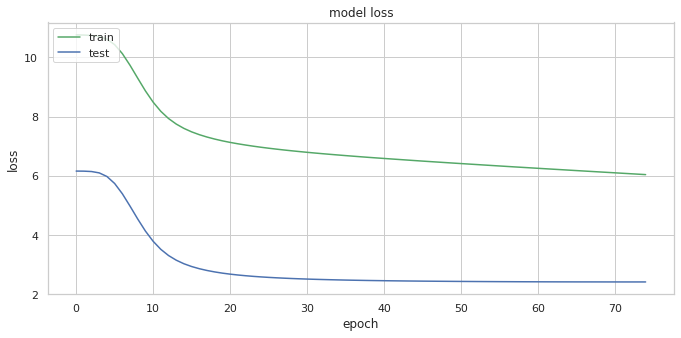

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

<a id="content5"></a>
## 5 ) Using a Neural Network

#### Now let us focus on the other main thing!!! Using a NN to matrix factorization.

1) Note that this way is not much different from the previous approach.

2) The main difference is that we have used Fully Connected layers as well as the Dropout layers and the BatchNormalization layers.

3) The number of units and the number of layers etc.. are the hyperparametrs here as in a traditional neural network.



## 5.1 ) Creating the Embeddings

####  Note that I have used 50 latent factors as that seems to give reasonable performance. Furhter tuning and careful optimization can give even better results.

In [ ]:
n_latent_factors=64
n_taxons=len(df_count['taxon_id'].unique())
n_users=len(df_count['user_id'].unique())

In [ ]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

In [ ]:
taxon_input=Input(shape=(1,),name='taxon_input',dtype='int64')
taxon_embedding=Embedding(n_taxons,n_latent_factors,name='taxon_embedding')(taxon_input)
taxon_vec=Flatten(name='FlattenTaxons')(taxon_embedding)
taxon_vec=Dropout(0.40)(taxon_vec)

In [ ]:
sim=dot([user_vec,taxon_vec],name='Simalarity-Dot-Product',axes=1)

## 5.2 ) Specifying the Model architecture

In [ ]:
nn_inp=Dense(96,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
# nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(96,activation='relu')(nn_inp)
nn_inp=Dropout(0.4)(nn_inp)
nn_inp=Dense(96,activation='relu')(nn_inp)
nn_model =keras.models.Model([user_input, taxon_input],nn_inp)
nn_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
taxon_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 64)        201280      user_input[0][0]                 
__________________________________________________________________________________________________
taxon_embedding (Embedding)     (None, 1, 64)        721664      taxon_input[0][0]                
____________________________________________________________________________________________

#### Notice the summary of the model and also the architecture of the model which u can tune of course.

## 5.3 ) Compiling the Model

In [ ]:
nn_model.compile(optimizer=Adam(lr=1e-3),loss='mse')

In [ ]:
batch_size=128
epochs=75

In [ ]:
nn_model.layers

In [ ]:
nn_model.layers[3].get_weights()

[array([[ 0.0220336 , -0.0180788 , -0.02295404, ..., -0.01822554,
         -0.01283438, -0.02260751],
        [-0.00419343,  0.00703074,  0.00802727, ...,  0.02633319,
          0.04739692, -0.02642432],
        [ 0.04697077,  0.04034426, -0.00283227, ...,  0.03234856,
         -0.04072899, -0.01721198],
        ...,
        [ 0.03005776, -0.00816023, -0.04890337, ...,  0.00893538,
          0.0450325 ,  0.04534951],
        [ 0.02483392, -0.00826072,  0.04796963, ...,  0.03056412,
         -0.00847201,  0.04667958],
        [ 0.02876283, -0.00150242, -0.03537656, ...,  0.0249346 ,
          0.0205992 , -0.00105589]], dtype=float32)]

## 5. 4) Fitting on Training set & Validating on Validation Set.

In [ ]:
History = nn_model.fit([train.user_id,train.taxon_id],train.counts, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.user_id,valid.taxon_id],valid.counts),
                              verbose = 1)

Epoch 1/75
882/882 [==============================] - 12s 13ms/step - loss: 7.1760 - val_loss: 3.1018
Epoch 2/75
882/882 [==============================] - 11s 12ms/step - loss: 5.9413 - val_loss: 2.7729
Epoch 3/75
882/882 [==============================] - 11s 13ms/step - loss: 5.8269 - val_loss: 2.5541
Epoch 4/75
882/882 [==============================] - 11s 13ms/step - loss: 8.8691 - val_loss: 2.5179
Epoch 5/75
882/882 [==============================] - 11s 13ms/step - loss: 5.7321 - val_loss: 2.4871
Epoch 6/75
882/882 [==============================] - 11s 13ms/step - loss: 9.9795 - val_loss: 2.5264
Epoch 7/75
882/882 [==============================] - 11s 13ms/step - loss: 4.9904 - val_loss: 2.5446
Epoch 8/75
882/882 [==============================] - 11s 13ms/step - loss: 4.0087 - val_loss: 2.5581
Epoch 9/75
882/882 [==============================] - 11s 13ms/step - loss: 3.9674 - val_loss: 2.5930
Epoch 10/75
882/882 [==============================] - 12s 13ms/step - loss: 13.00

#### Note that the validation loss is close to 0.84 which is quite decent. Also note that it has decrreased from 1.26 in the case of normal Matrix Factorization to this value here.

####  Similary playing with no of latent factors,  other parameters in the model architecture can give to even better results!!!!!

## Predict

In [ ]:
from numpy import array
import matplotlib.pyplot as plt
import numpy as np

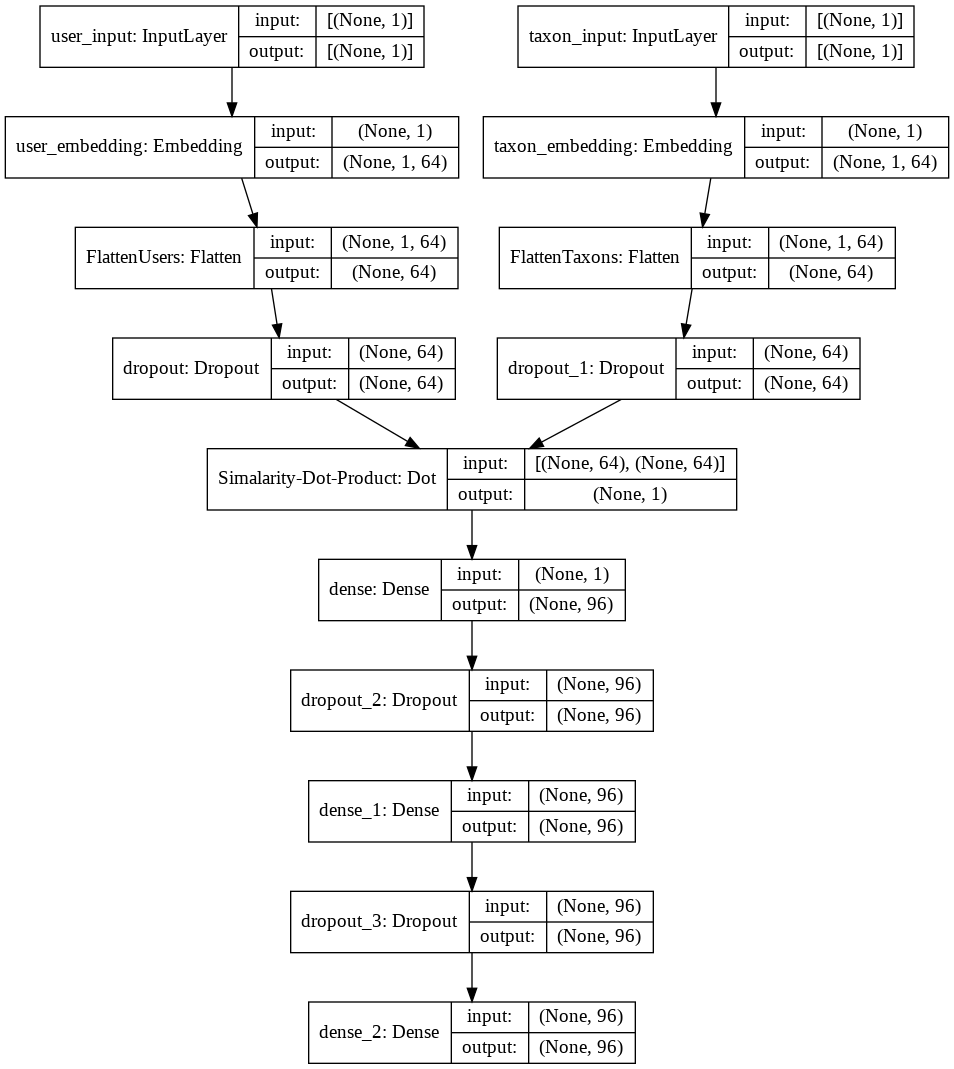

In [ ]:
keras.utils.plot_model(nn_model, show_shapes=True) 


In [ ]:
nn_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
taxon_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 64)        201280      user_input[0][0]                 
__________________________________________________________________________________________________
taxon_embedding (Embedding)     (None, 1, 64)        721664      taxon_input[0][0]                
____________________________________________________________________________________________

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])

nn_model.evaluate([train.user_id,train.taxon_id],train.counts)

3525/3525 [==============================] - 4s 944us/step - loss: 1.4836 - coeff_determination: -4232026.0146


[1.1608664989471436, -7728379.5]

#Extract Movie embedding

In [ ]:
import collections

In [ ]:
taxon_model = keras.Model(inputs=taxon_input, outputs=taxon_vec)
TAXON_EMBEDDING_LIST = []
TAXON_EMBED_MAP = collections.defaultdict()

In [ ]:
UNIQUE_TAXON_IDS = df_count['taxon_id'].unique()

In [ ]:
UNIQUE_TAXON_IDS.max()

11275

In [ ]:
for _id in UNIQUE_TAXON_IDS:
    emb = taxon_model.predict(np.array([_id]))
    val = list(emb.reshape(1,-1))[0]
    TAXON_EMBEDDING_LIST.insert(_id, val)
    # TAXON_EMBED_MAP[_id] = val

In [ ]:
# util_df_count.fillna(0)
# df['taxon_name'].isnull().values.any()
df['taxon_name'].fillna("NA_real")

0                 Cicadellidae
1                 Cicadellidae
2                 Cicadellidae
3                 Cicadellidae
4                 Cicadellidae
                  ...         
247659       Cyathea australis
247660       Cyathea australis
247661             Choniastrum
247662             Choniastrum
247663    Allium haematochiton
Name: taxon_name, Length: 247664, dtype: object

In [ ]:
taxon_emb = pd.DataFrame(np.array(TAXON_EMBEDDING_LIST).reshape(len(TAXON_EMBEDDING_LIST),64))
taxon_emb['taxon_name'] = df['taxon_name'].unique()
taxon_emb = taxon_emb.set_index('taxon_name')

In [ ]:
taxon_emb

0         1   ...        62        63
taxon_name                                  ...                    
Cicadellidae           -0.159296  0.153045  ... -0.127841  0.027072
Flavoparmelia caperata -0.061507  0.018293  ... -0.108106 -0.098995
Usnea                  -0.019018 -0.014780  ...  0.315464 -0.146088
Parmelia               -0.131767  0.026821  ...  0.234601  0.092295
Lobaria anthraspis      0.148118 -0.019352  ...  0.320383  0.162724
...                          ...       ...  ...       ...       ...
Dianthus chinensis      0.247127  0.116909  ...  0.237807  0.361162
Wisteria frutescens     0.174709  0.246818  ...  0.227663  0.277532
Cyathea australis       0.145874  0.152071  ...  0.205178  0.179030
Choniastrum             0.135589  0.132731  ...  0.216957  0.245246
Allium haematochiton    0.178296  0.163107  ... -0.162043  0.254711

[11276 rows x 64 columns]

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE

In [ ]:
features = taxon_emb.loc[:, :]

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

projections_df = {
    'x':  projections[:,0],
    'y': projections[:,1],
    'taxon_name' : taxon_emb.index
        }


In [ ]:
len(projections_df['x']) == len(projections_df['taxon_name'])

True

In [ ]:
fig = px.scatter(
    projections_df, x='x', y='y'#, #,text = 'taxon_name',#,#top_movies_emb.index,
    #color='taxon_name', labels={'color': 'taxon_name'}
)
fig.show()

In [ ]:
fig = px.scatter(
    projections_df, x='x', y='y',text = 'taxon_name'#,#top_movies_emb.index,
    #color='taxon_name', labels={'color': 'taxon_name'}
)
fig.show()

# top

In [ ]:
top_n = 100

In [ ]:
top_movies = df.groupby('taxon_id')['user_id'].count().reset_index(name="reviews").sort_values(ascending=False, by="reviews").head(top_n).merge(df[['taxon_id', 'taxon_name']], on = "taxon_id")
top_movies
# top_taxons = df_count.sort_values(ascending=False, by="counts").head(25).merge(df[['taxon_id', 'taxon_name']], on = "taxon_id")

taxon_id  reviews              taxon_name
0            57     2601                 Plantae
1            57     2601                 Plantae
2            57     2601                 Plantae
3            57     2601                 Plantae
4            57     2601                 Plantae
...         ...      ...                     ...
67671       329      363  Ceanothus thyrsiflorus
67672       329      363  Ceanothus thyrsiflorus
67673       329      363  Ceanothus thyrsiflorus
67674       329      363  Ceanothus thyrsiflorus
67675       329      363  Ceanothus thyrsiflorus

[67676 rows x 3 columns]

In [ ]:
# intialise data of lists. 
top_taxons = pd.DataFrame({'taxon_name':top_movies['taxon_name'].unique(), 
        'taxon_id':top_movies['taxon_id'].unique()})

# top_taxons

In [ ]:
TAXON_EMBEDDING_LIST_TOP = list( TAXON_EMBEDDING_LIST[i] for i in top_taxons['taxon_id'] )
top_taxon_emb = pd.DataFrame(np.array(TAXON_EMBEDDING_LIST_TOP).reshape(len(TAXON_EMBEDDING_LIST_TOP),64))
top_taxon_emb['taxon_name'] = top_taxons['taxon_name']
top_taxon_emb = top_taxon_emb.set_index('taxon_name')
top_taxon_emb

0         1   ...        62        63
taxon_name                                    ...                    
Plantae                   0.098366  0.330212  ...  0.141700  0.101386
Magnoliopsida            -0.179196  0.133935  ...  0.087282 -0.019550
NaN                       0.059627 -0.111333  ...  0.041889 -0.099180
Sceloporus occidentalis   0.188669  0.290383  ...  0.157938  0.114031
Eschscholzia californica -0.041054 -0.004596  ...  0.022947 -0.043833
...                            ...       ...  ...       ...       ...
Bombus vosnesenskii       0.333029  0.124682  ... -0.025271  0.459464
Iris                      0.142917  0.121306  ... -0.250499  0.149732
Pteridium aquilinum       0.029820  0.302737  ...  0.141736  0.076292
Lathyrus vestitus        -0.282476 -0.130855  ... -0.072251 -0.020664
Ceanothus thyrsiflorus   -0.066975  0.319130  ...  0.329094 -0.107725

[100 rows x 64 columns]

In [ ]:
cos_dist = pdist(top_taxon_emb, 'cosine')


In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

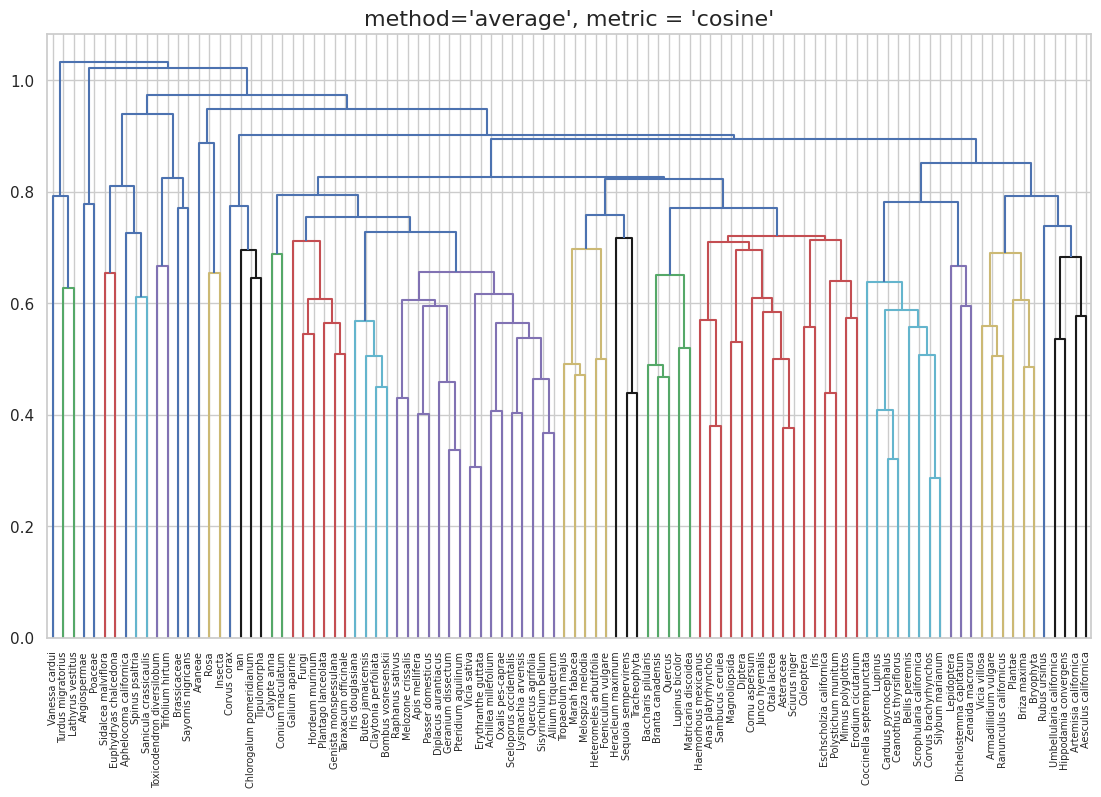

In [ ]:
mergings = linkage(top_taxon_emb, method='average', metric = 'cosine')
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=7,
           labels = top_taxon_emb.index
           )
plt.title("method='average', metric = 'cosine'", fontsize=16)
# fig = plt.figure(figsize=(12, 18))
# plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.show()

clusts_cos = fcluster(mergings, t = 1.0)

In [ ]:
features = top_taxon_emb.loc[:, :]

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

projections_df = {'x':  projections[:,0],
        'y': projections[:,1],
         'title' : top_taxon_emb.index,
         'cluster' : clusts_cos
        }

fig = px.scatter(
    projections_df, x='x', y='y', text = 'title',#top_movies_emb.index,
    color='cluster', labels={'color': 'cluster'}
)
fig.show()

## UMAP


In [ ]:
from umap import UMAP
import plotly.express as px

features = top_taxon_emb.loc[:, :]

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    text = top_taxon_emb.index,
    color=clusts_cos, labels={'color': 'cluster'}
)

fig_2d.show()

In [ ]:
umap_3d = UMAP(n_components=3, init='random', random_state=0)
proj_3d = umap_3d.fit_transform(features)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    text = top_taxon_emb.index,
    color=clusts_cos, labels={'color': 'cluster'}
)
fig_3d.update_traces(marker_size=5)
fig_3d.show()

In [ ]:
len(taxon_emb.index)

11276

In [ ]:
features = taxon_emb.loc[:, :].dropna()

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    # text = taxon_emb.index,
    # color=clusts_cos, labels={'color': 'cluster'}
)

fig_2d.show()

# hist


In [ ]:
import plotly.express as px
fig = px.histogram(df_count['counts'], x="counts", title='Histogram of taxon counts',)
fig.show()

In [ ]:
df_sum = df_count.groupby(['user_id','taxon_id']).agg({'counts': 'sum'})
# Change: groupby state_office and divide by sum
# df_pcts = df_sum.groupby(level=0).apply(lambda x:
#                                                  100 * x / float(x.sum()))
# df_pcts
df_sum = df_sum.reset_index().drop(columns=["taxon_id"]).groupby(['user_id']).agg({'counts': 'sum'})
fig = px.histogram(df_sum['counts'], x="counts", title='Histogram of user counts',nbins=5000)
fig.show()

In [ ]:
# df_sum
df_sum.loc[df_sum['counts'] >= 5]

counts
user_id        
0          2325
1            37
2           959
3          2342
4            15
...         ...
4651          6
4652         34
4653          6
4654          6
4655          7

[4656 rows x 1 columns]

# PCA

In [ ]:
index=list(df_count['user_id'].unique())
columns=list(df_count['taxon_id'].unique())
index=sorted(index)
columns=sorted(columns)
 
util_df_count=pd.pivot_table(data=df_count,values='counts',index='user_id',columns='taxon_id')

In [ ]:
util_df_count = util_df_count.fillna(0)
util_df_count.head()

taxon_id   0     1     2     3     4     5    ...  324  325  326  327  328  329
user_id                                       ...                              
0         22.0  23.0  41.0  69.0  26.0  42.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
1          1.0   3.0   0.0   0.0   0.0   0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
2         18.0  13.0  63.0  36.0  18.0  10.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
3         24.0  44.0  62.0  30.0  21.0  28.0  ...  0.0  0.0  2.0  1.0  1.0  0.0
4          0.0   0.0   0.0   0.0   1.0   0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 330 columns]

### SCALE

In [ ]:
from sklearn.preprocessing import StandardScaler
# features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# # Separating out the features
# x = df.loc[:, features].values
# # Separating out the target
# y = df.loc[:,['target']].values
# # Standardizing the features
util_df_count_scaled = StandardScaler().fit_transform(util_df_count)
util_df_count_scaled

array([[ 6.31197852,  4.63883947,  5.79708081, ..., -0.02374232,
        -0.02374232, -0.02374232],
       [ 0.06253634,  0.25465329, -0.28288224, ..., -0.02374232,
        -0.02374232, -0.02374232],
       [ 5.12160858,  2.44674638,  9.05950001, ..., -0.02374232,
        -0.02374232, -0.02374232],
       ...,
       [-0.23505615, -0.40297463, -0.28288224, ..., -0.02374232,
        -0.02374232, -0.02374232],
       [-0.23505615, -0.40297463, -0.28288224, ..., -0.02374232,
        -0.02374232, -0.02374232],
       [-0.23505615, -0.40297463, -0.28288224, ..., -0.02374232,
        -0.02374232, -0.02374232]])

### LSA
https://stackoverflow.com/questions/34725726/is-it-possible-apply-pca-on-any-text-classification
https://scikit-learn.org/stable/modules/decomposition.html

In [ ]:
### svd = TruncatedSVD(n_components=5, random_state=42)
data = svd.fit_transform(data) 

### PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(util_df_count_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

ValueError: ignored

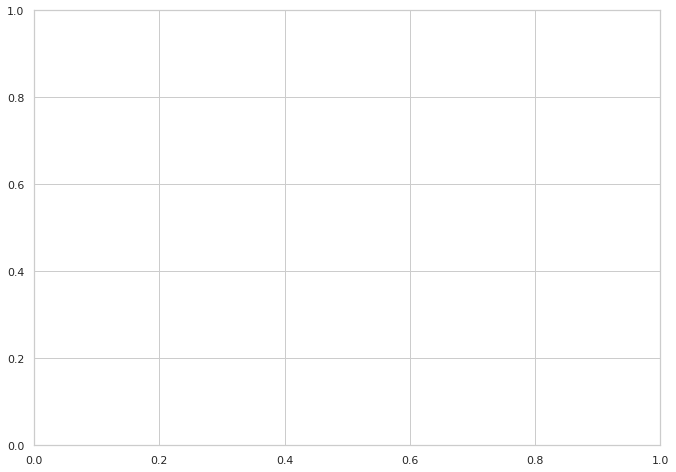

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,335), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

In [ ]:
pca.explained_variance_ratio_.cumsum()[0:10]

array([0.16640836, 0.22663325, 0.26484413, 0.29616913, 0.32254222,
       0.34785061, 0.37121556, 0.39140505, 0.41045391, 0.42726153])

In [ ]:
pca = PCA(n_components = 2 ,svd_solver='arpack')
pca.fit(util_df_count_scaled)
scores_pca = pca.transform(util_df_count_scaled)
scores_pca

array([[ 7.72118331e+01, -2.88684532e+01],
       [-1.80741811e+00,  1.30715783e-02],
       [ 3.02497969e+01, -1.59977539e+01],
       ...,
       [-1.20655448e+00, -4.76314114e-01],
       [-2.05423831e+00,  2.11288357e-01],
       [ 6.77945665e-01, -1.04498582e+00]])

In [ ]:
pca.explained_variance_ratio_

array([0.16640836, 0.06022489])

In [ ]:
principalDf = pd.DataFrame(data = scores_pca
             , columns = ['pc1', 'pc2'])
principalDf['user_id'] = principalDf.index
principalDf

pc1        pc2  user_id
0     77.211833 -28.868453        0
1     -1.807418   0.013072        1
2     30.249797 -15.997754        2
3     98.758316  -5.268436        3
4     -2.128073   0.190689        4
...         ...        ...      ...
1770  -1.398080   0.262088     1770
1771  -2.258795   0.245479     1771
1772  -1.206554  -0.476314     1772
1773  -2.054238   0.211288     1773
1774   0.677946  -1.044986     1774

[1775 rows x 3 columns]

## 2d color

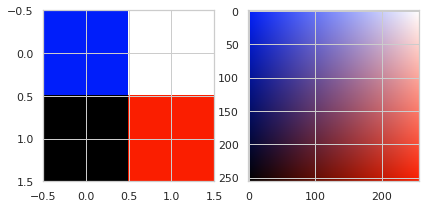

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

im=np.array([[[0,30,250],[  255, 255,  255]],
             [[0, 0, 0], [ 250, 30, 0]]])

from scipy.ndimage.interpolation import zoom
zoomed=zoom(im,(128,128,1),order=1)

plt.subplot(121)
plt.imshow(im,interpolation='nearest')
plt.subplot(122)
plt.imshow(zoomed,interpolation='nearest')
plt.show()

In [ ]:
# This function was derived from code written by Andras Deak    
def color_square2(colors, size):
    tl, tr, bl, br = map(np.array, colors)
    m = size - 1
    x, y = np.mgrid[0:size, 0:size]
    x = x[..., None] / m
    y = y[..., None] / m
    data = np.floor(x*y*br + (1-x)*y*tr + x*(1-y)*bl + (1-x)*(1-y)*tl + 0.5)
    return Image.fromarray(np.array(data, dtype = 'uint8'), 'RGB')

# color_square = color_square1

tl = (255, 0, 0)
tr = (255, 255, 0)
bl = (0, 0, 255)
br = (0, 255, 0)

# tl = (108, 115, 111)
# tr = (239, 239, 192)
# bl = (124, 137, 129)
# br = (192, 192, 175)

colors = (tl, tr, bl, br)
size = 256
img = color_square2(colors, size)
img.show()

# GIS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
coor_df = sf_df[['latitude', 'longitude', 'id', 'user_login']]
coor_df = coor_df[coor_df['latitude'] < -110].dropna()
coor_df = coor_df.merge(unique_users, on = 'user_login')
coor_df = coor_df.merge(principalDf, on = 'user_id')
coor_df

latitude  longitude        id  ... user_id        pc1        pc2
0      -122.076131  37.421869   5677489  ...       0  77.211833 -28.868453
1      -122.244887  37.349021   5695848  ...       0  77.211833 -28.868453
2      -122.244309  37.341228   5695852  ...       0  77.211833 -28.868453
3      -122.244383  37.341256   5695858  ...       0  77.211833 -28.868453
4      -122.244404  37.341243   5695863  ...       0  77.211833 -28.868453
...            ...        ...       ...  ...     ...        ...        ...
127942 -122.519030  38.351526  52759055  ...    1774   0.677946  -1.044986
127943 -122.519030  38.351526  52759056  ...    1774   0.677946  -1.044986
127944 -122.519030  38.351526  52759058  ...    1774   0.677946  -1.044986
127945 -122.519030  38.351526  52759059  ...    1774   0.677946  -1.044986
127946 -122.519030  38.351526  52760192  ...    1774   0.677946  -1.044986

[127947 rows x 7 columns]

In [ ]:
coordinates = coor_df.drop(columns=['id', 'user_login', 'user_id', 'pc1', 'pc1']).to_numpy()

In [ ]:
# kmeans_kwargs = {
#     "init": "random",
#     "n_init": 10,
#     "max_iter": 300,
#     "random_state": 42,
# }

# # A list holds the SSE values for each k
# sse = []
# for k in range(20, 100):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(coordinates)
#     sse.append(kmeans.inertia_)

# plt.style.use("fivethirtyeight")
# plt.plot(range(20, 100), sse)
# plt.xticks(range(20, 100))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()

KeyboardInterrupt: ignored

#### kmean

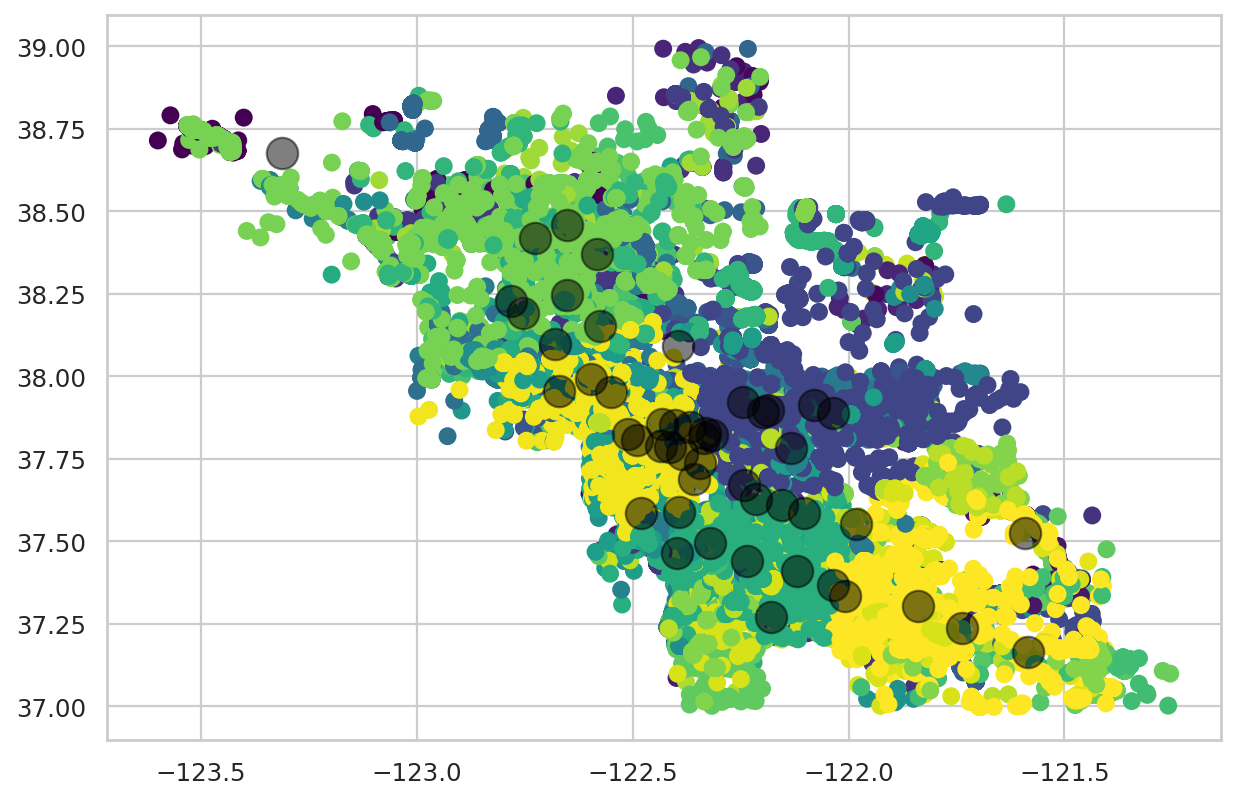

In [ ]:
#Train model
kmeans = KMeans(n_clusters=50)
kmeans.fit(coordinates)
#Plot clusters
figure(num=None, figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=kmeans.predict(coordinates), s=50, cmap='viridis')
centers = kmeans.cluster_centers_
# plt.xlim(min(coordinates[:,0]) - 10, -50)
plt.scatter(
centers[:, 0],
centers[:, 1],
c='black',
s=200,
alpha=0.5
);

#### dbscan

No handles with labels found to put in legend.


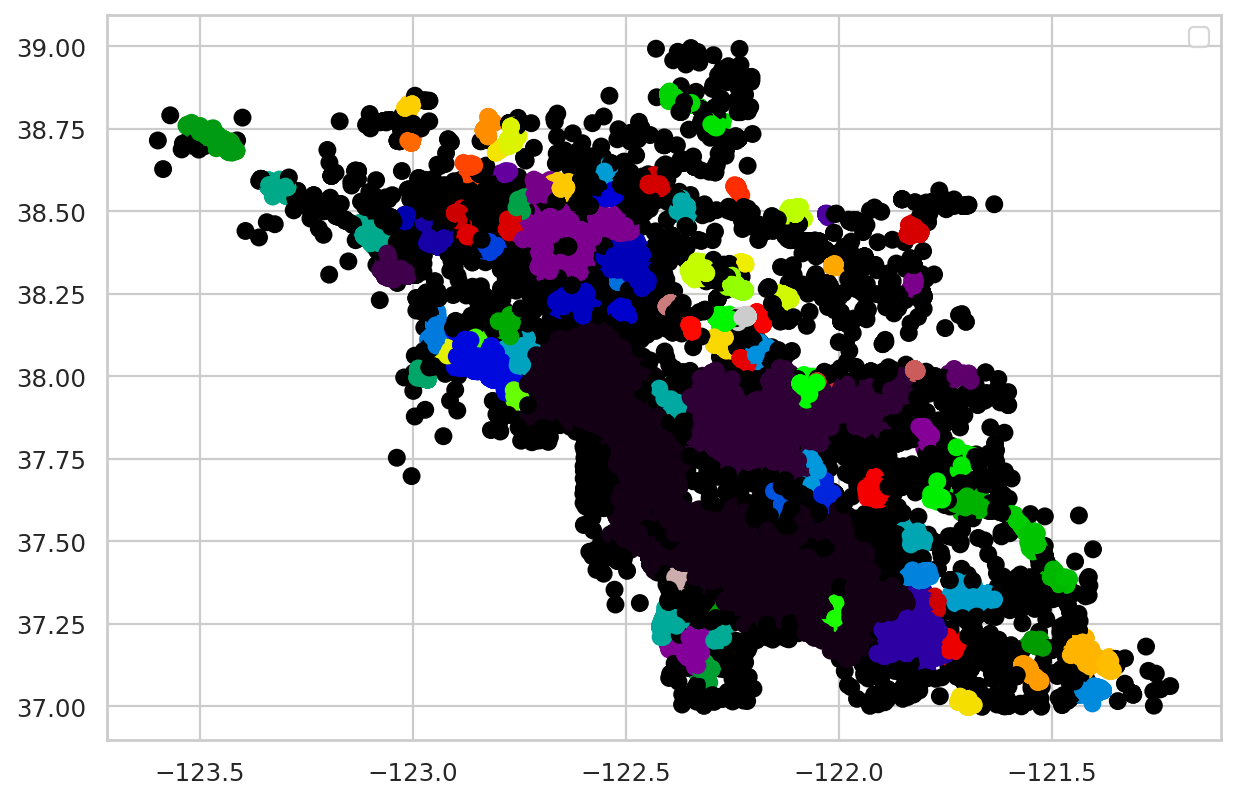

In [ ]:
clustering = DBSCAN(eps=1.5/6371., min_samples=50, algorithm='ball_tree', metric='haversine').fit(np.radians(coordinates))

figure(num=None, figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=clustering.labels_, s=50, cmap='nipy_spectral')
plt.legend() 
# centers = kmeans.cluster_centers_
# plt.xlim(min(coordinates[:,0]) - 10, -50)
# plt.scatter(
# centers[:, 0],
# centers[:, 1],
# c='black',
# s=200,
# alpha=0.5
# );

In [ ]:
import collections
collections.Counter(clustering.labels_)

Counter({-1: 5242,
         0: 78986,
         1: 22894,
         2: 397,
         3: 121,
         4: 141,
         5: 366,
         6: 6117,
         7: 245,
         8: 229,
         9: 571,
         10: 53,
         11: 82,
         12: 4934,
         13: 248,
         14: 125,
         15: 2006,
         16: 453,
         17: 90,
         18: 98,
         19: 1387,
         20: 89,
         21: 103,
         22: 125,
         23: 94,
         24: 217,
         25: 382,
         26: 371,
         27: 160,
         28: 157,
         29: 84,
         30: 754,
         31: 1003,
         32: 387,
         33: 116,
         34: 240,
         35: 255,
         36: 200,
         37: 259,
         38: 276,
         39: 243,
         40: 146,
         41: 173,
         42: 776,
         43: 114,
         44: 52,
         45: 425,
         46: 300,
         47: 166,
         48: 79,
         49: 258,
         50: 120,
         51: 456,
         52: 60,
         53: 226,
         54: 123,
  

In [ ]:
coor_df['cluster']=kmeans.predict(coordinates)
coor_df['cluster_scan']=clustering.labels_

NameError: ignored

## BASEmap

In [ ]:
# !pip install mpl_toolkits
# !pip install matplotlib-venn
# !pip install basemap
# !pip install Basemap
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
!brew install geos
!pip install https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap

Text(0.5, 1.0, 'K mean citizen science districts, San Francisco PC1')

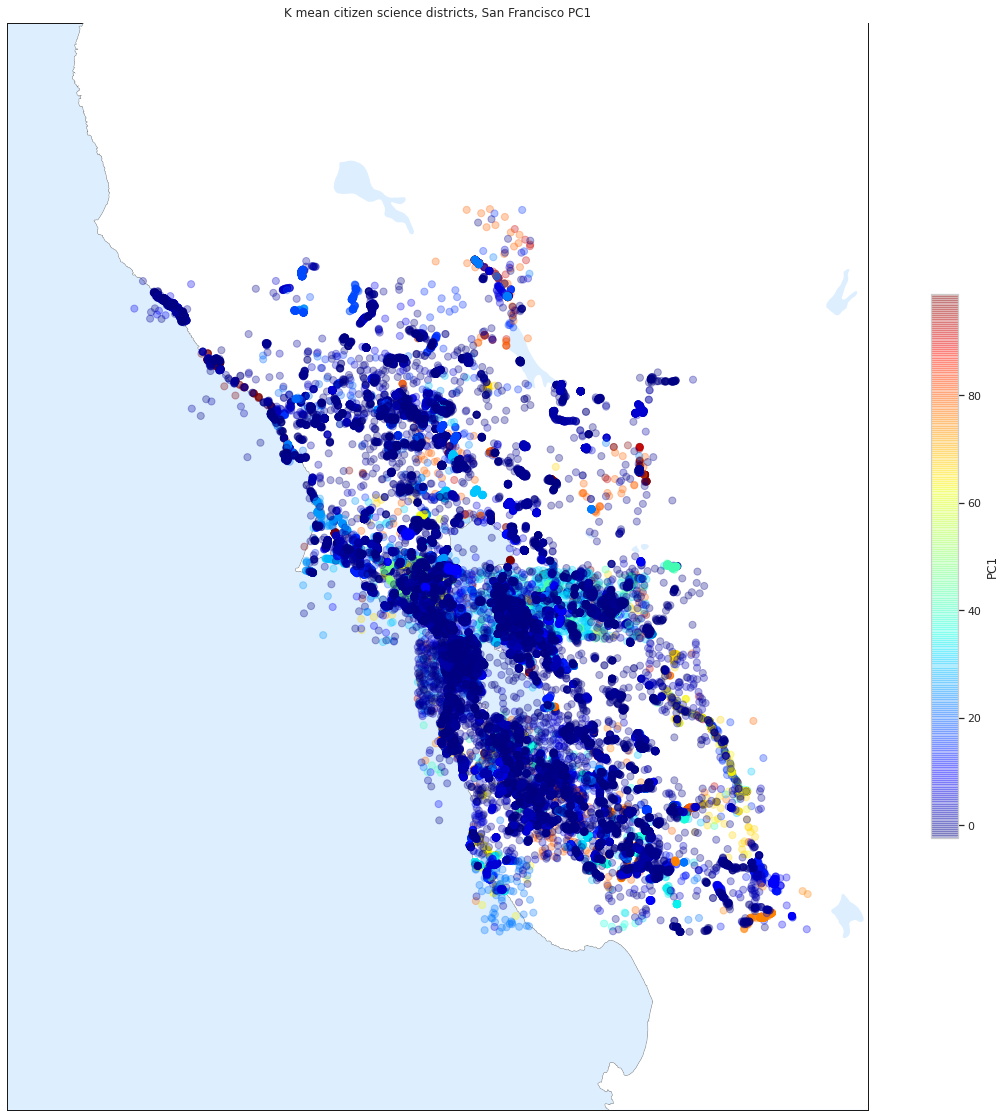

In [ ]:
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution=None,
#             width=8E6, height=8E6, 
#             lat_0=45, lon_0=-100,)
# m.etopo(scale=0.5, alpha=0.5)

# # Map (long, lat) to (x, y) for plotting
# x, y = m(-122.3, 47.6)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' Seattle', fontsize=12);
# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='merc', resolution='f', 
            lat_0=37.7749, lon_0=-122.4194,
            # width=2.5E5, height=3E5,
            llcrnrlon=-124.000, llcrnrlat= 36.5, urcrnrlon=-121.00, urcrnrlat=39.5, epsg = 7131)
# m.shadedrelief()
# m.bluemarble()
m.drawmapboundary(fill_color='#DDEEFF', zorder = 1)
m.fillcontinents(color="white", lake_color='#DDEEFF', zorder=5)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray' ,zorder=11)
m.drawstates(color='gray',zorder=11)
# m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 12000, verbose= True)
# m.arcgisimage(service='World_Physical_Map', xpixels = 12000, verbose= True)
# m.arcgisimage(service='USA_Topo_Maps', xpixels = 15000, verbose= True)

# 2. scatter citizen data
# and size reflecting area
m.scatter(coordinates[:, 0], coordinates[:, 1], latlon=True,
          # c=kmeans.predict(coordinates), 
          c = coor_df['pc1'],
          s=50,
          cmap='jet', alpha=0.3 ,zorder = 9)

# # 2.5 centers
# m.scatter(
#   centers[:, 0],
#   centers[:, 1],
#   c='black',
#   s=200,
#   alpha=0.5,
#   zorder = 10
# 

# 3. create colorbar and legend
# plt.colorbar(label='PC1 scores')
# plt.clim(3, 7)
# plt.legend()
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("PC1")

plt.title('K mean citizen science districts, San Francisco PC1')

Text(0.5, 1.0, 'K mean citizen science districts, San Francisco PC2')

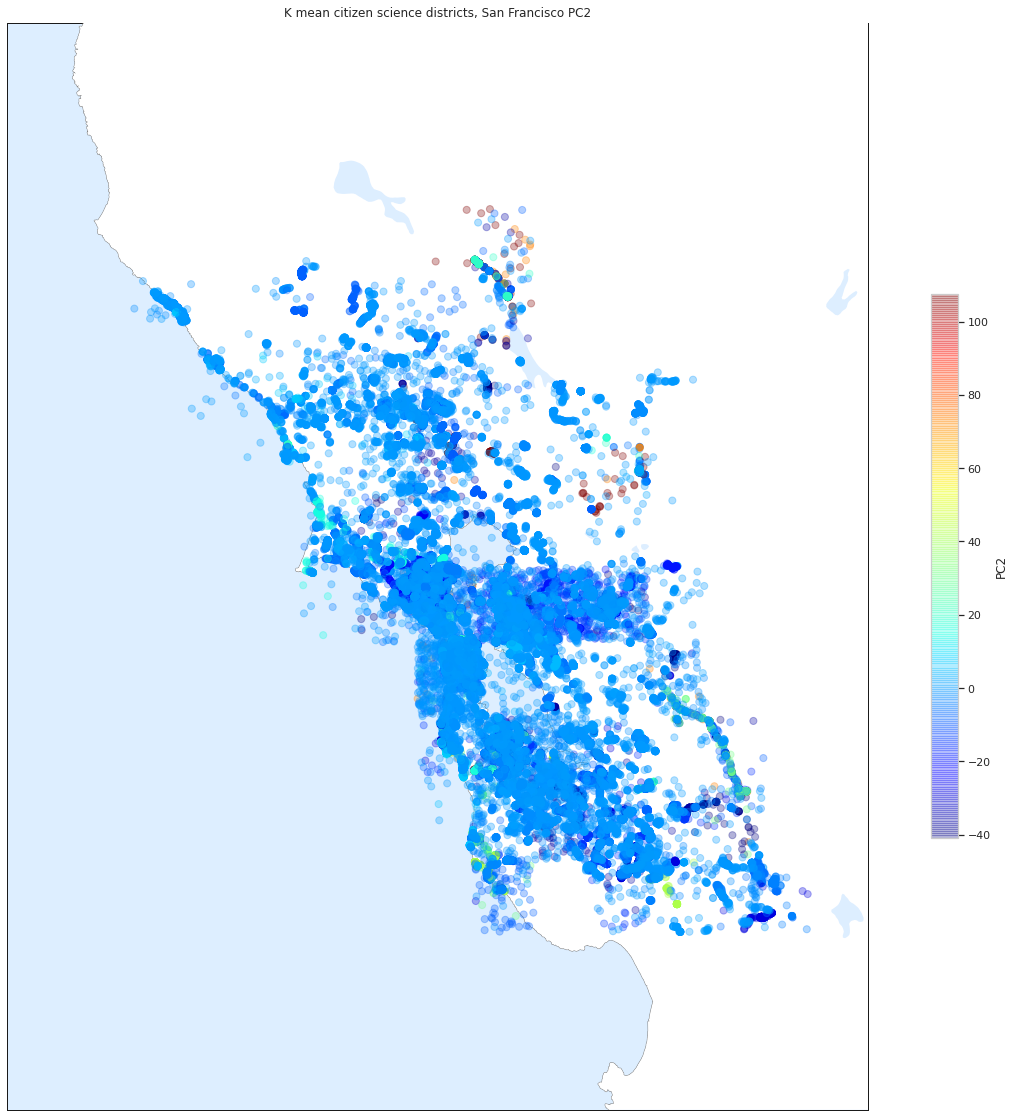

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='merc', resolution='f', 
            lat_0=37.7749, lon_0=-122.4194,
            # width=2.5E5, height=3E5,
            llcrnrlon=-124.000, llcrnrlat= 36.5, urcrnrlon=-121.00, urcrnrlat=39.5, epsg = 7131)

m.drawmapboundary(fill_color='#DDEEFF', zorder = 1)
m.fillcontinents(color="white", lake_color='#DDEEFF', zorder=5)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray' ,zorder=11)
m.drawstates(color='gray',zorder=11)

m.scatter(coordinates[:, 0], coordinates[:, 1], latlon=True,
          # c=kmeans.predict(coordinates), 
          c = coor_df['pc2'],
          s=50,
          cmap='jet', alpha=0.3 ,zorder = 9)


c2 = plt.colorbar(orientation='vertical', shrink = 0.5)
c2.set_label("PC2")

plt.title('K mean citizen science districts, San Francisco PC2')

TypeError: ignored

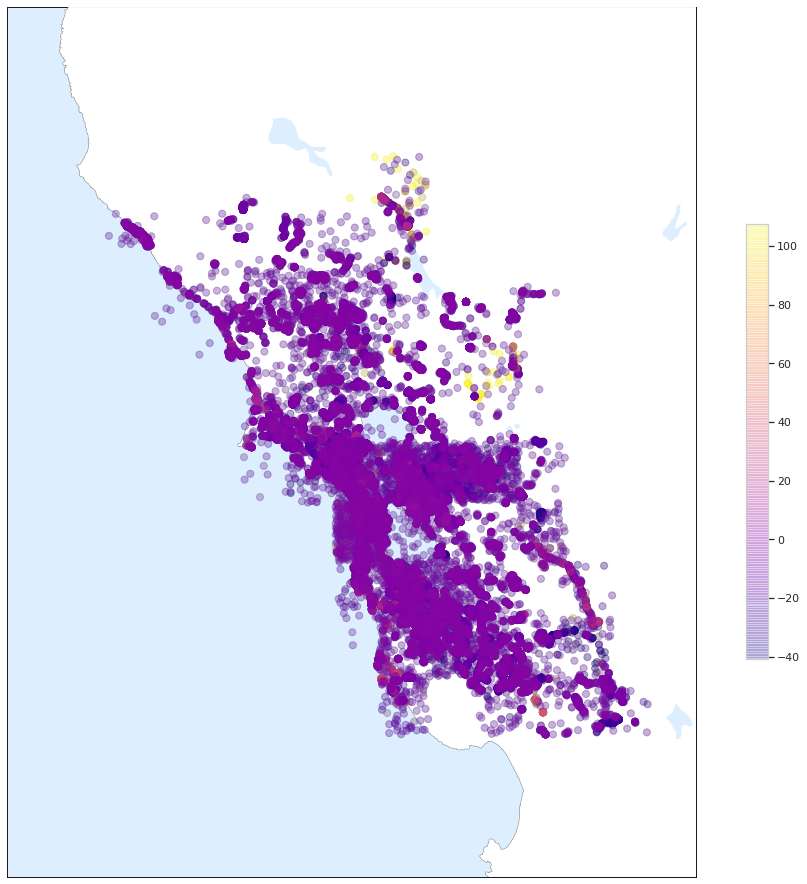

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='f', 
            lat_0=37.7749, lon_0=-122.4194,
            # width=2.5E5, height=3E5,
            llcrnrlon=-124.000, llcrnrlat= 36.5, urcrnrlon=-121.00, urcrnrlat=39.5, epsg = 7131)

m.drawmapboundary(fill_color='#DDEEFF', zorder = 1)
m.fillcontinents(color="white", lake_color='#DDEEFF', zorder=5)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray' ,zorder=11)
m.drawstates(color='gray',zorder=11)

sc1 = m.scatter(coordinates[:, 0], coordinates[:, 1], latlon=True,
          # c=kmeans.predict(coordinates), 
          c = coor_df['pc2'],
          s=50,
          cmap='viridis', alpha=0.2 ,zorder = 9)
sc2 = m.scatter(coordinates[:, 0], coordinates[:, 1], latlon=True,
          # c=kmeans.predict(coordinates), 
          c = coor_df['pc2'],
          s=50,
          cmap='plasma', alpha=0.2 ,zorder = 9)

c1 = plt.colorbar(orientation='vertical', shrink = 0.5, )
c1.set_label("PC1")
c2 = plt.colorbar(orientation='vertical', shrink = 0.5)
c2.set_label("PC2")

plt.title('K mean citizen science districts, San Francisco PC2, PC1')

## interactive

In [ ]:
!pip install geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mplleaflet
import mplleaflet as mpll

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28555 sha256=ba1e7282852c687108155956b27b1d0d430f99c61f9259a8c4e080fff6fe44cd
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
# mpll.display(fig=f,)
plt.scatter(coordinates[:1000, 0], coordinates[:1000, 1], c=kmeans.predict(coordinates)[:1000], s=50, cmap='viridis')
# mpll.show()
mpll.display(fig=f)

## Clustered point map

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
# lat_0=37.7749, lon_0=-122.4194
m = folium.Map(location=[37.77495, -122.4194], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)


In [ ]:

# Following this example: https://github.com/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

# Get x and y coordinates for each point
# points["x"] = points["geometry"].apply(lambda geom: geom.x)
# points["y"] = points["geometry"].apply(lambda geom: geom.y)

# Create a list of coordinate pairs
locations = list(zip(coordinates[:, 1], coordinates[:, 0]))

In [ ]:
# Create a folium marker cluster
marker_cluster = MarkerCluster(locations)

# Add marker cluster to map
marker_cluster.add_to(m)

In [ ]:
# Show map
m

In [ ]:
outfp = "/content/drive/MyDrive/Colab Notebooks/CS/map.html"
m.save(outfp)

# People

In [ ]:
sf_df_c = sf_df[sf_df['id'].isin(coor_df['id'])]
sf_df_c['cluster'] = coor_df['cluster']
sf_df_c.head()

captive                 created_at  ...   user_login cluster
0    False  2017-04-13T13:29:41-07:00  ...  gyrrlfalcon      30
1    False  2017-04-13T18:37:08-07:00  ...     paranger      19
2    False  2017-04-13T18:44:41-07:00  ...     paranger      19
3    False  2017-04-14T00:20:21-07:00  ...        kueda      32
4    False  2017-04-14T00:29:36-07:00  ...   damontighe       1

[5 rows x 39 columns]

In [ ]:
taxon_by_cluster = sf_df_c.groupby(['cluster', 'taxon_name'])['taxon_name'].count().reset_index(name="taxon_count").sort_values(ascending=False, by="taxon_count")
taxon_by_cluster

cluster                taxon_name  taxon_count
26328       29                   Plantae          676
25049       29              Angiospermae          318
40803       48                   Plantae          220
26048       29             Magnoliopsida          184
25661       29  Eschscholzia californica          160
...        ...                       ...          ...
18480       20            Symphoricarpos            1
18478       20       Sympetrum corruptum            1
18477       20                 Sympetrum            1
18475       20          Sturnus vulgaris            1
41765       49                 Zygoptera            1

[41766 rows x 3 columns]

In [ ]:
taxon_by_cluster = taxon_by_cluster.groupby(['cluster', 'taxon_name']).agg({'taxon_count': 'sum'})
taxon_by_cluster = taxon_by_cluster.reset_index()
taxon_by_cluster
# cluster_pcts = taxon_by_cluster.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# cluster_pcts

cluster               taxon_name  taxon_count
0            0          Acanthus mollis            1
1            0        Acer macrophyllum           18
2            0     Achillea millefolium           17
3            0     Acmaeodera hepburnii            1
4            0                 Acmispon            5
...        ...                      ...          ...
41761       49           Wyethia glabra            6
41762       49      Wyethia helenioides            1
41763       49         Zenaida macroura            1
41764       49  Zonotrichia atricapilla            3
41765       49                Zygoptera            1

[41766 rows x 3 columns]

In [ ]:
# # taxon_by_cluster[taxon_by_cluster.groupby(['cluster'])['taxon_count'].transform(max) == taxon_by_cluster['taxon_count']]
# taxon_by_cluster_top3 = taxon_by_cluster.groupby('cluster')['taxon_count'].nlargest(3)
# taxon_by_cluster_top3 = taxon_by_cluster_top3.to_frame()
# taxon_by_cluster_top3
taxon_by_cluster_top3 = taxon_by_cluster.sort_values(by=['taxon_count'], ascending=False).groupby('cluster').head(10).reset_index(drop=True).sort_values(by=['cluster']).reset_index(drop=True)
taxon_by_cluster_top3

cluster                taxon_name  taxon_count
0          0             Vicia villosa           34
1          0                      Iris           24
2          0  Eschscholzia californica           26
3          0      Diplacus aurantiacus           30
4          0       Sisyrinchium bellum           36
..       ...                       ...          ...
495       49       Lithophragma affine           11
496       49    Collinsia heterophylla           12
497       49       Amsinckia menziesii            8
498       49            Cathartes aura            9
499       49       Agelaius phoeniceus            8

[500 rows x 3 columns]

In [ ]:
# taxon_by_cluster_top3.drop( index = 0)
taxon_by_cluster_top3.columns = ['cluster', 'top_taxon_name', 'taxon_count']
# taxon_by_cluster_top3 = taxon_by_cluster_top3.to_frame()
# taxon_by_cluster_top3
taxon_by_cluster_top3 = taxon_by_cluster_top3.groupby('cluster')['top_taxon_name'].apply(' '.join).reset_index()
taxon_by_cluster_top3

cluster                                     top_taxon_name
0         0  Vicia villosa Iris Eschscholzia californica Di...
1         1  Anas platyrhynchos Nycticorax nycticorax Apis ...
2         2  Zenaida macroura Calypte anna Corvus brachyrhy...
3         3  Plantae Eschscholzia californica Claytonia per...
4         4  Notholithocarpus densiflorus Pedicularis densi...
5         5  Calochortus pulchellus Collinsia heterophylla ...
6         6  Sisyrinchium bellum Sceloporus occidentalis Fu...
7         7  Fungi Cardamine californica Iris douglasiana E...
8         8  Nycticorax nycticorax Sceloporus occidentalis ...
9         9  Ceanothus cuneatus Melanerpes lewis Kaernefelt...
10       10  Fremontodendron californicum Dudleya cymosa Lu...
11       11  Eschscholzia californica Euphydryas chalcedona...
12       12  Calypte anna Agelaius phoeniceus Raphanus sati...
13       13  Toxicodendron diversilobum Sceloporus occident...
14       14  Lysimachia latifolia Rubus ursinus Eschscholzi...
15       15  Sisyrinchium bellum Toxicodendron diversilobum...
16       16  Layia platyglossa Iris douglasiana Magnoliopsi...
17       17  Aquilegia formosa Adiantum jordanii Claytonia ...
18       18  Achillea millefolium Corallorhiza maculata Cla...
19       19  Eschscholzia californica Claytonia perfoliata ...
20       20  Quercus agrifolia Medicago polymorpha Sisyrinc...
21       21  Scrophularia californica Lobularia maritima Te...
22       22  Cathartes aura Eschscholzia californica Quercu...
23       23  Heracleum maximum Sisyrinchium bellum Sidalcea...
24       24  Orgyia Magnoliopsida Otala lactea Anas platyrh...
25       25  Lupinus Fungi Castilleja exserta Calochortus a...
26       26  Calochortus amabilis Sceloporus occidentalis I...
27       27  Rubus ursinus Taricha granulosa Eschscholzia c...
28       28  Tragopogon porrifolius Briza maxima Vicia vill...
29       29  Apis mellifera Tropaeolum majus Fumaria capreo...
30       30  Branta canadensis Sterna forsteri Osmia Anas p...
31       31  Sciurus carolinensis Haemorhous mexicanus Esch...
32       32  Aesculus californica Sequoia sempervirens Sciu...
33       33  Lupinus Pseudacris sierra Sisyrinchium bellum ...
34       34  Poaceae Lepus californicus Wyethia angustifoli...
35       35  Junco hyemalis Sterna forsteri Calidris mauri ...
36       36  Eschscholzia californica Pisaster ochraceus He...
37       37  Anas platyrhynchos Vicia villosa Iris douglasi...
38       38  Ceanothus cuneatus Collinsia heterophylla Pinu...
39       39  Aquilegia formosa Calochortus amabilis Agelaiu...
40       40  Sisyrinchium bellum Genista monspessulana Iris...
41       41  Limnanthes douglasii rosea Lepidurus packardi ...
42       42  Eschscholzia californica Heracleum maximum Dip...
43       43  Trifolium hirtum Dichelostemma capitatum Adeli...
44       44  Vicia villosa Agelaius phoeniceus Calochortus ...
45       45  Dichelostemma capitatum Enallagma Calochortus ...
46       46  Rosa Centranthus ruber Plantae Salvia Anas pla...
47       47  Diplacus aurantiacus Sisyrinchium bellum Lysim...
48       48  Magnoliopsida Scrophularia californica Bacchar...
49       49  Sialia mexicana Sidalcea malviflora Eschscholz...

In [ ]:
sf_df_c =sf_df_c.merge(taxon_by_cluster_top3[['cluster', 'top_taxon_name']] , on='cluster')

In [ ]:
sf_df_c2 = sf_df_c[['id', 'created_at', 'taxon_name', 'top_taxon_name', 'user_id']].dropna()

sf_df_c2['common_taxon'] = sf_df_c2.apply(lambda x: x.taxon_name in x.top_taxon_name, axis=1)
sf_df_c2

id                 created_at  ...  user_id common_taxon
0        5677489  2017-04-13T13:29:41-07:00  ...     8778        False
1        5688389  2017-04-14T08:07:08-07:00  ...   421862        False
2        5689483  2017-04-14T08:42:58-07:00  ...   421862        False
3        5690434  2017-04-14T09:19:20-07:00  ...   108876         True
4        5696739  2017-04-14T12:48:32-07:00  ...   451821        False
...          ...                        ...  ...      ...          ...
138972  44614847  2020-05-02T10:46:52-07:00  ...    29735         True
138973  44616628  2020-05-02T10:58:40-07:00  ...    29735         True
138974  44617191  2020-05-02T11:02:59-07:00  ...    29735         True
138975  44806971  2020-05-03T15:28:52-07:00  ...  2774456        False
138976  50064992  2020-06-18T10:10:52-07:00  ...  2182198        False

[138338 rows x 6 columns]

In [ ]:
common_taxons = sf_df_c2[['user_id', 'common_taxon', 'id']].groupby(['user_id','common_taxon']).count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
common_taxons

# fig = px.histogram(common_taxons['id'], x="counts", title='Histogram of users with common taxons',nbins=5000)
# fig.show()

user_id  common_taxon          id
0           1         False   98.103666
1           1          True    1.896334
2           5         False   57.142857
3           5          True   42.857143
4          17         False   82.758621
...       ...           ...         ...
8298  3704356         False  100.000000
8299  3728745         False  100.000000
8300  3767368         False  100.000000
8301  3858974         False  100.000000
8302  3868435         False  100.000000

[8303 rows x 3 columns]

In [ ]:
fig = px.histogram(common_taxons, x="id", color = 'common_taxon',
                   title='Histogram of users with common taxons for cluster',
                   marginal="violin", nbins=500,
                                    labels={
                     "id": "% of data",
                     "common_taxon": "taxon in top 10 in cluster",
                 })
fig.show()

In [ ]:
fig = px.histogram(common_taxons[common_taxons['common_taxon'] == True], 
                   x="id", title='Histogram of users with common taxons',
                   nbins=500, color = 'common_taxon', color_discrete_sequence=["red", "blue"],
                   labels={
                     "id": "% of data",
                     "common_taxon": "taxon in top 10 in cluster",
                 })
fig.show()

1. Hdbsacn
2. DRaw PCA as color
3. pair distance

## pair distance

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np

X = np.arange(10).reshape(-1,2)
Y = np.arange(10).reshape(-1,2)

cdist(X, Y)